# <span style="color:#336699">Agrupamento utilizando redes SOM - II</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Autor: Flávio Belizário da Silva Mota
    <br/><br/>
    Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contato: <a href="mailto:flavio.belizario.mota@gmail.com">flavio.belizario.mota@gmail.com</a>
    <br/><br/>
    Data de entrega: 23 de Julho de 2022
    <br>
    Professor: Marcos Goncalves Quiles
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Objetivo.</b> Esse caderno Jupyter tem como objetivo apresentar o uso do SOM na tarefa de agrupamento, como parte do Projeto 2 da disciplina de Neurocomputação (CAP-351). Os dados utilizados são provenientes do conjunto de dados para o benchmark de problemas de agrupamento.
</div>

<br/>
<div>
    <b>Os dados podem ser encontrados em:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    https://github.com/deric/clustering-benchmark
    </div>
</div>

## Instalando e importando bibliotecas

In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=3b70a33ec886d8d2fce1ed32ca27975a111cdacb34326566a4ced9fedab6a171
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=845f33ca9ba3edb43e8af39d34f14d99a593d84c68c3810790efd33b7d3fb9fb
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import wget
import pandas as pd
from scipy.io import arff
from sklearn import preprocessing
from minisom import MiniSom
import seaborn as sns

## Baixando e carregando os dados

In [4]:
url='https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/sizes3.arff'
wget.download(url)

'sizes3.arff'

In [5]:
data = arff.loadarff('sizes3.arff')
data = pd.DataFrame(data[0])
# removendo o caracter 'b'
for nome_col in data.columns:
  if data[nome_col].dtype != 'float64':
    data[nome_col] = data[nome_col].apply(lambda col: col.decode('utf-8'))

data

,a0,a1,class
0,9.285310,14.587900,0
1,12.397700,8.448900,0
2,8.736240,11.680300,0
3,9.101970,12.832700,0
4,12.294800,8.673730,0
...,...,...,...
995,0.951624,1.631500,3
996,1.421170,-0.673289,3
997,1.475480,-2.454380,3
998,-0.633825,0.591556,3


In [6]:
data['class'].value_counts()

0    667
1    111
2    111
3    111
Name: class, dtype: int64

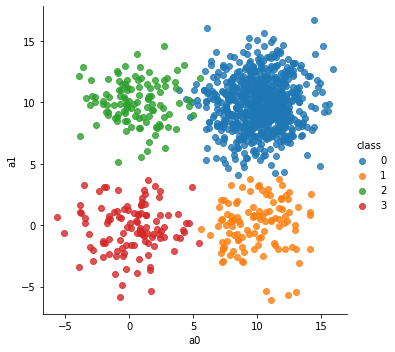

In [7]:
sns.lmplot(x='a0', y='a1', data=data, hue='class', fit_reg=False)

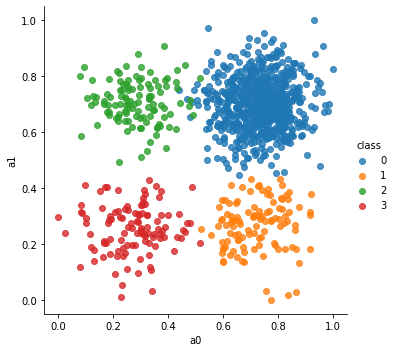

In [8]:
dados = data.drop(columns='class')
dados = preprocessing.MinMaxScaler().fit_transform(dados)
df_red = pd.DataFrame(data=dados, columns=['a0', 'a1'])
df_red['class'] = data['class']
sns.lmplot(x='a0', y='a1', data= df_red, hue='class', fit_reg=False)

In [9]:
dados.shape

(1000, 2)

## Funcões utilitárias

In [10]:
def u_matrix(som, dados):
  plt.figure(figsize=(6, 6))

  plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
  plt.colorbar()
  plt.xticks(np.arange(0, m+1, 1.0))
  plt.yticks(np.arange(0, n+1, 1.0))

  markers = ['o','+','*','.']
  colors = {0:'tab:blue', 
          1: 'tab:orange', 
          2: 'tab:green', 
          3: 'tab:red'}
  grupo = data['class'].astype(int).values

  for cnt, xx in enumerate(dados):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5, markers[grupo[cnt]], markerfacecolor='None',
              markeredgecolor=colors[grupo[cnt]], markersize=12, markeredgewidth=2)
  plt.show()

def frequencias(som, dados):
  plt.figure(figsize=(6, 6))
  plt.xticks(np.arange(0, m+1, 1.0))
  plt.yticks(np.arange(0, n+1, 1.0))
  frequencies = som.activation_response(dados)
  plt.pcolor(frequencies.T, cmap='Blues') 
  plt.colorbar()
  plt.show()

def coordenadas_vencedor(som, dados):
  label_names = [0,1,2,3]

  w_x, w_y = zip(*[som.winner(d) for d in dados])
  w_x = np.array(w_x)
  w_y = np.array(w_y)
  grupo = data['class'].astype(int).values
  colors = {0:'tab:blue', 
            1: 'tab:orange', 
            2: 'tab:green', 
            3: 'tab:red'}

  plt.figure(figsize=(6, 6))
  plt.xticks(np.arange(0, m+1, 1.0))
  plt.yticks(np.arange(0, n+1, 1.0))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()

  for c in np.unique(grupo):
      idx_target = grupo==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, c=colors[c], label=label_names[c])
  plt.legend(bbox_to_anchor =(0.65, 1.0))
  plt.grid()
  plt.show()

def hom_impar(m, n, som, dados):
  import matplotlib.gridspec as gridspec

  label_names = [0,1,2,3]
  grupo = data['class'].astype(int).values
  labels_map = som.labels_map(dados, [label_names[t] for t in grupo])

  fig = plt.figure(figsize=(6, 6))
  the_grid = gridspec.GridSpec(n, m, fig)
  for position in labels_map.keys():
      label_fracs = [labels_map[position][l] for l in label_names]
      plt.subplot(the_grid[n-1-position[1],
                          position[0]], aspect=1)
      patches, texts = plt.pie(label_fracs)

  plt.legend(patches, label_names, ncol=3, bbox_to_anchor =(0.65, 1.25))
  plt.show()

def hom_par(m, n, som, dados):
  import matplotlib.gridspec as gridspec

  label_names = [0,1,2,3]
  grupo = data['class'].astype(int).values
  labels_map = som.labels_map(dados, [label_names[t] for t in grupo])

  fig = plt.figure(figsize=(6, 6))
  the_grid = gridspec.GridSpec(m, n, fig)
  for position in labels_map.keys():
      label_fracs = [labels_map[position][l] for l in label_names]
      plt.subplot(the_grid[m-1-position[1],
                          position[0]], aspect=1)
      patches, texts = plt.pie(label_fracs)

  plt.legend(patches, label_names, ncol=3, bbox_to_anchor =(0.65, 1.25))
  plt.show()

## Modelos

Para o conjunto de dados utilizado, os rótulos de cada grupo já são conhecidos, portanto é possível definir a quantidade esperada de grupos. Os testes a seguir apresentam os resultados com variações da rede (grid, sigma e taxa de aprendizagem).

### Modelo 1

Modelo com grid 2x2 (4 neurônios), sigma de 1 e taxa de aprendizagem de 0,5, treinado por 2000 iterações:

In [11]:
m = 2
n = 2
sigma = 1.0
aprendizagem = .5
max_iter = 2000
som = MiniSom(m, n, dados.shape[1], sigma=sigma, learning_rate=aprendizagem,
              neighborhood_function='gaussian', random_seed=42)
som.train(dados, max_iter)
print('Erro de quantização: ', som.quantization_error(dados))
print('Erro de topografia: ', som.topographic_error(dados))

Erro de quantização:  0.2576759381869606
Erro de topografia:  0.0


Matriz U:

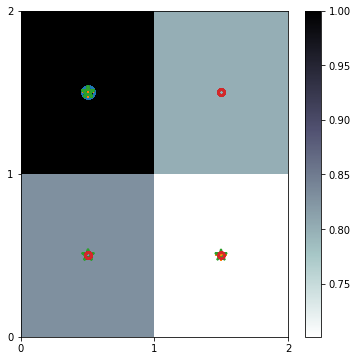

In [12]:
u_matrix(som, dados)

Frequência de ativação dos neurônios da rede:

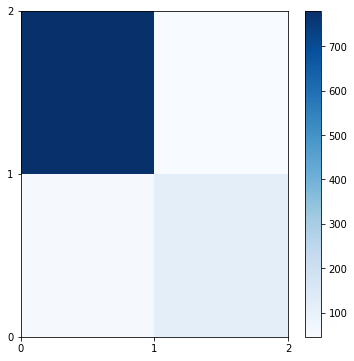

In [13]:
frequencias(som, dados)

Distribuição das amostras pelo mapa:

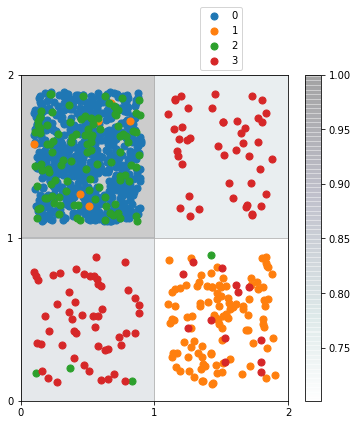

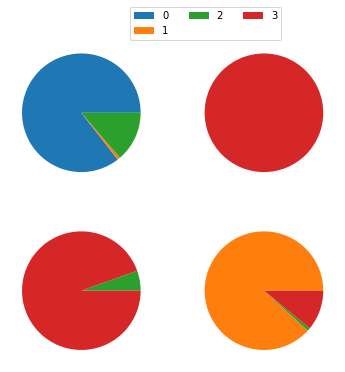

In [14]:
coordenadas_vencedor(som, dados)
hom_par(m,n,som,dados)

Considerando uma rede na qual supostamente um neurônio é utilizado para agrupar dados de um mesmo grupo, os resultados indicam que a rede não é capaz de gerar agrupamentos homogêneos, ainda que um dos neurônios tenha agrupado apenas amostras do grupo 3. O neurônio mais distante de seus vizinhos (matriz U) se aproximou mais dos exemplos do grupo 0 (conforme distribuição de amostras no mapa), mas ainda assim agrupou amostras de outros 2 grupos. O grande número de ativações desse neurônio se deve ao fato de que os exemplos do grupo 0 existem em maior número no conjunto de dados. 

### Modelo 2

Modelo com grid 2x2 (4 neurônios), sigma de 1 e taxa de aprendizagem de 0,4, treinado por 2000 iterações:

In [15]:
m = 2
n = 2
sigma = 1.0
aprendizagem = .4
max_iter = 2000
som = MiniSom(m, n, dados.shape[1], sigma=sigma, learning_rate=aprendizagem,
              neighborhood_function='gaussian', random_seed=42)
som.train(dados, max_iter)
print('Erro de quantização: ', som.quantization_error(dados))
print('Erro de topografia: ', som.topographic_error(dados))

Erro de quantização:  0.23147044925614468
Erro de topografia:  0.0


Matriz U:

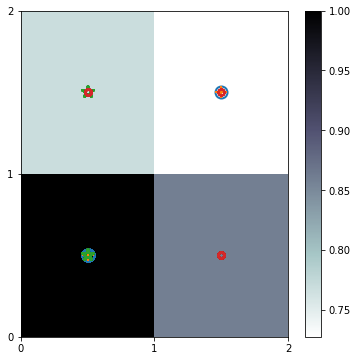

In [16]:
u_matrix(som, dados)

Frequência de ativação dos neurônios da rede:

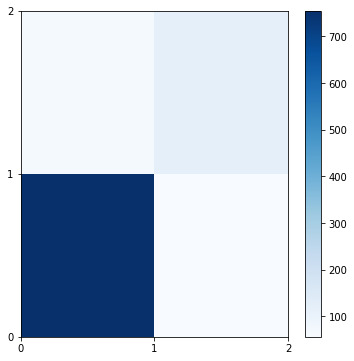

In [17]:
frequencias(som, dados)

Distribuição das amostras pelo mapa:

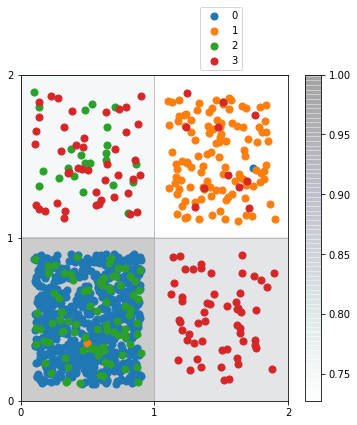

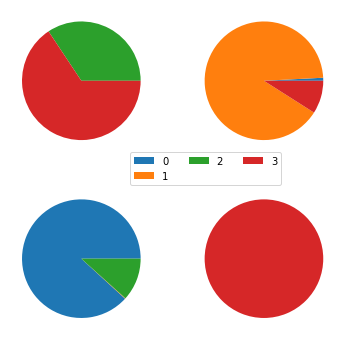

In [18]:
coordenadas_vencedor(som, dados)
hom_par(m,n,som,dados)

Diminuir a taxa de aprendizagem da rede não parece impactar na melhoria dos agrupamentos gerados.

### Modelo 3

Modelo com grid 3x2 (6 neurônios), sigma de 1 e taxa de aprendizagem de 0,1, treinado por 2000 iterações:

In [19]:
m = 3
n = 2
sigma = 1.0
aprendizagem = .1
max_iter = 2000
som = MiniSom(m, n, dados.shape[1], sigma=sigma, learning_rate=aprendizagem,
              neighborhood_function='gaussian', random_seed=42)
som.train(dados, max_iter)
print('Erro de quantização: ', som.quantization_error(dados))
print('Erro de topografia: ', som.topographic_error(dados))

Erro de quantização:  0.09963621143447293
Erro de topografia:  0.0


Matriz U:

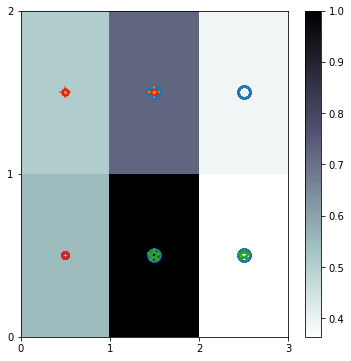

In [20]:
u_matrix(som, dados)

Frequência de ativação dos neurônios da rede:

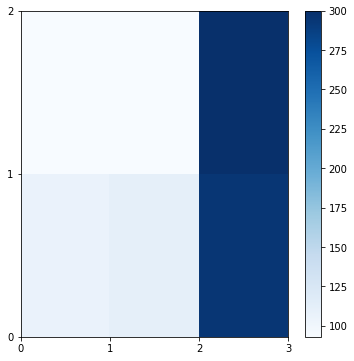

In [21]:
frequencias(som, dados)

Distribuição das amostras pelo mapa:

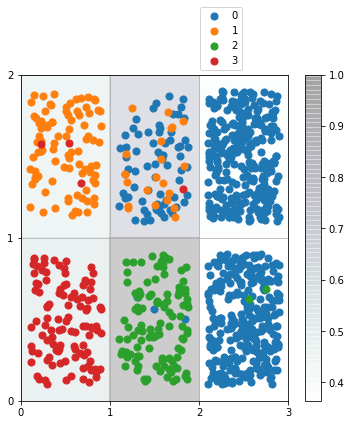

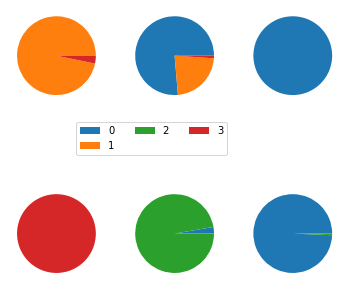

In [22]:
coordenadas_vencedor(som, dados)
hom_impar(m,n,som,dados)

Ao aumentar a dimensão da rede e diminuir a taxa de aprendizagem, o erro de quantização diminui e grupos mais homogêneos são formados. É possível notar pela distribuição das amostras no mapa que o modelo agora é capaz de separar as amostras do grupo 0 e 2. O gráfico da matriz u também aponta esse fato, uma vez que o neurônio que mais se destaca é aquele que agrupa as amostras do grupo 2.

### Modelo 4

Modelo com grid 3x3 (9 neurônios), sigma de 1 e taxa de aprendizagem de 0,1, treinado por 2000 iterações:

In [23]:
m = 3
n = 3
sigma = 1.
aprendizagem = .1
max_iter = 2000
som = MiniSom(m, n, dados.shape[1], sigma=sigma, learning_rate=aprendizagem,
              neighborhood_function='gaussian', random_seed=42)
som.train(dados, max_iter)
print('Erro de quantização: ', som.quantization_error(dados))
print('Erro de topografia: ', som.topographic_error(dados))

Erro de quantização:  0.08476722133673605
Erro de topografia:  0.003


Matriz U:

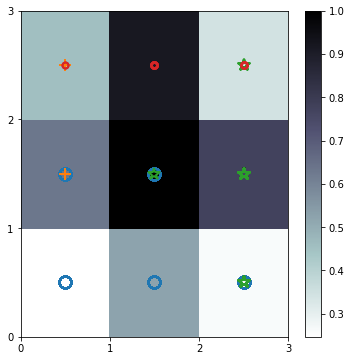

In [24]:
u_matrix(som, dados)

Frequência de ativação dos neurônios da rede:

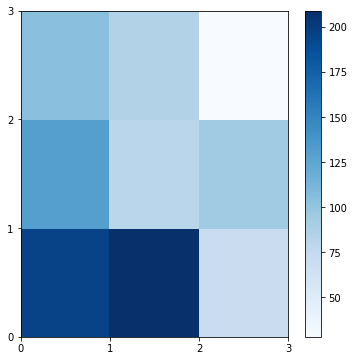

In [25]:
frequencias(som, dados)

Distribuição das amostras pelo mapa:

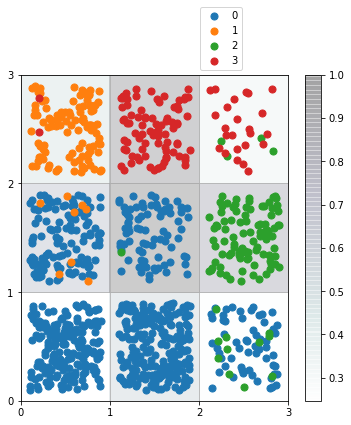

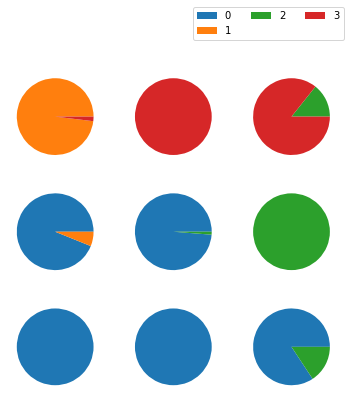

In [26]:
coordenadas_vencedor(som, dados)
hom_impar(m,n,som,dados)

Aumentar a dimensão da rede para 9 neurônios implicou na redução do erro de quantização da rede. É possível notar a formação de grupos mais homogêneos e neurônios que se destacam mais em relação aos seus vizinhos (matriz u).

### Modelo 5

Modelo com grid 5x2 (10 neurônios), sigma de 1 e taxa de aprendizagem de 0,1, treinado por 2000 iterações:

In [27]:
m = 5
n = 2
sigma = 1.
aprendizagem = .1
max_iter = 2000
som = MiniSom(m, n, dados.shape[1], sigma=sigma, learning_rate=aprendizagem,
              neighborhood_function='gaussian', random_seed=42)
som.train(dados, max_iter)
print('Erro de quantização: ', som.quantization_error(dados))
print('Erro de topografia: ', som.topographic_error(dados))

Erro de quantização:  0.07665860128359354
Erro de topografia:  0.146


Matriz U:

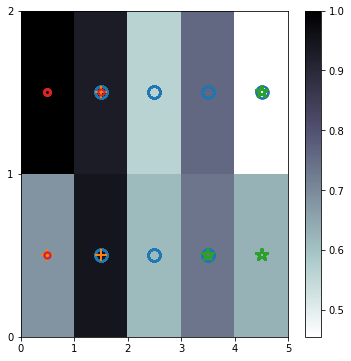

In [28]:
u_matrix(som,dados)

Frequência de ativação dos neurônios da rede:

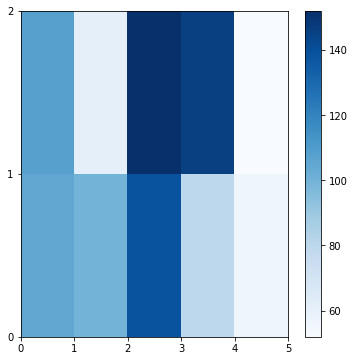

In [29]:
frequencias(som,dados)

Distribuição das amostras pelo mapa:

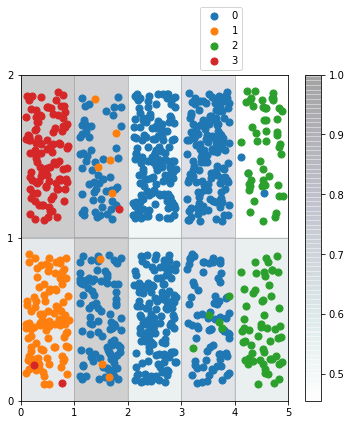

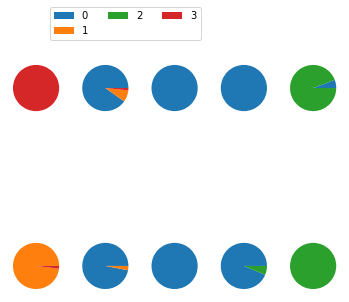

In [30]:
coordenadas_vencedor(som,dados)
hom_impar(m,n,som,dados)

Ao aumentar a dimensão da rede para 10 neurônios é possível notar a redução do erro de quantização bem como a criação de grupos mais homogêneos. Pela distribuição das amostras no mapa, fica clara a separação dos grupos 1 e 3 do grupo 2.

### Modelo 6

Modelo com grid 5x5 (25 neurônios), sigma de 1 e taxa de aprendizagem de 0,1, treinado por 2000 iterações:

In [31]:
m = 5
n = 5
max_iter = 2000
sigma = 1.0
aprendizagem = .1
som = MiniSom(m, n, dados.shape[1], sigma=sigma, learning_rate=aprendizagem,
              neighborhood_function='gaussian', random_seed=42)
som.train(dados, max_iter)
print('Erro de quantização: ', som.quantization_error(dados))
print('Erro de topografia: ', som.topographic_error(dados))

Erro de quantização:  0.05614698567576018
Erro de topografia:  0.112


Matriz U:

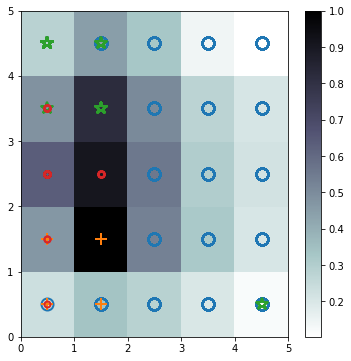

In [32]:
u_matrix(som, dados)

Frequência de ativação dos neurônios da rede:

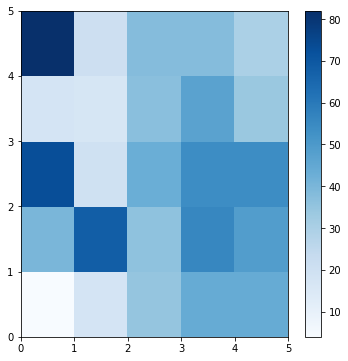

In [33]:
frequencias(som, dados)

Distribuição das amostras pelo mapa:

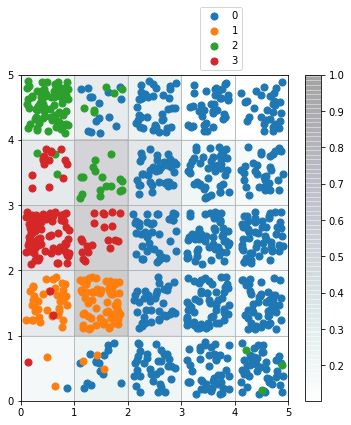

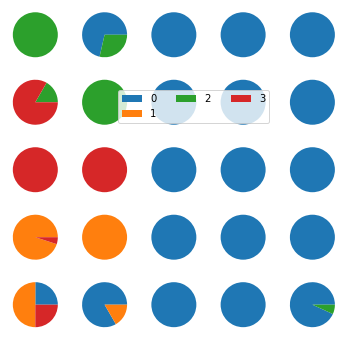

In [34]:
coordenadas_vencedor(som, dados)
hom_par(m,n,som,dados)

Aumentar a dimensão da rede para 25 neurônios diminui o erro de quantização da rede, ao passo que aumenta o erro de topologia da rede. Os agrupamentos gerados são mais homogêneos (ainda que não completamente) e é possível identificar amostras que ficam nas regiões de separação dos grupos. Pela matriz u, é possível verificar que os neurônios que mais se distanciam de seus vizinhos são aqueles que agrupam exclusivamente amostras dos grupos 1, 2 e 3.

## Considerações Finais

Considerando o conjunto de dados empregado nessa análise, utilizar uma rede com mais neurônios se mostra mais eficiente, ainda que o conjunto possua poucos grupos. Isso se dá pela distribuição do dado, uma vez que o grupo identificado como grupo 0 possui mais amostras que os outros. O emprego de uma rede de maior dimensionalidade permite também a identificação daquelas amostras que se encontram em pontos de separação dos grupos.